[[  1.89204492  -0.85100453   8.44304546]
 [ -3.88481214  11.84107667   8.05311528]
 [-10.8384393   -9.98930231   2.95193507]]
(3, 3)
[[ 1.69780431 -0.2589507   8.84570122]
 [-3.88481214 11.84107667  8.05311528]
 [ 0.          0.          0.        ]]
(3, 3)
[[[9.99473797e-01 9.99971710e-01 3.33333333e-01]
  [2.33271752e-05 1.40391323e-06 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00]]

 [[0.00000000e+00 0.00000000e+00 0.00000000e+00]
  [9.24414608e-01 9.95020671e-01 3.33333333e-01]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00]]

 [[0.00000000e+00 0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00]
  [3.33333333e-01 3.33333333e-01 3.33333333e-01]]]
(3, 3, 3)
[[  1.89204492  -0.85100453   8.44304546]
 [ -3.88481214  11.84107667   8.05311528]
 [-10.8384393   -9.98930231   2.95193507]]
(3, 3)
[[ 1.89194271 -0.85098779  8.71148263]
 [-3.88481214 11.84107667  8.05311528]
 [-3.6128131  -3.32976744  0.98397836]]
(3, 3)
[[ 1.6977021  -0.25893395

[[  1.70915996 -26.36939936   1.88105175]
 [  1.94012912 -22.86150745   2.19299335]
 [  1.49074089  -1.67372038   0.25325832]]
(3, 3)
[[  1.80616641 -27.51247473   1.99070142]
 [  1.94012912 -22.86150745   2.19299335]
 [  0.           0.           0.        ]]
(3, 3)
[[[0.33333333 0.33333333 0.33333333]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.         0.         0.        ]
  [0.33333333 0.33333333 0.33333333]
  [0.         0.         0.        ]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.33333333 0.33333333 0.33333333]]]
(3, 3, 3)
[[  5.4656102  -24.52831082   0.42624798]
 [  3.56288903 -20.31900427  -1.73704287]
 [  3.9580981  -13.97125696  -4.16158224]]
(3, 3)
[[  3.02598101 -26.51775343   1.46921694]
 [  2.48104909 -22.01400639   0.88298128]
 [  1.31936603  -4.65708565  -1.38719408]]
(3, 3)
[[  3.15003346 -27.61845374   1.51336601]
 [  2.48104909 -22.01400639   0.88298128]
 [  0.           0.           0

[[ 4.69082829e+00 -1.38202926e+02  2.84096169e+00]
 [-9.77354244e-02 -5.02460571e+01 -1.68792800e+00]
 [-1.83955731e+00 -4.80155121e+00 -5.04296260e+00]]
(3, 3)
[[ 4.68594152e+00 -1.40715229e+02  2.75656529e+00]
 [-9.77354244e-02 -5.02460571e+01 -1.68792800e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]
(3, 3)
[[[0.33333333 0.33333333 0.33333333]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.         0.         0.        ]
  [0.33333333 0.33333333 0.33333333]
  [0.         0.         0.        ]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.33333333 0.33333333 0.33333333]]]
(3, 3, 3)
[[   0.39335084 -141.27810509   -0.77694891]
 [   0.89984508  -54.3615407     2.16678712]
 [   0.33444285  -21.01841327   -0.70672173]]
(3, 3)
[[ 3.25507796e+00 -1.40902855e+02  1.57872722e+00]
 [ 2.34791409e-01 -5.16178850e+01 -4.03022960e-01]
 [ 1.11480949e-01 -7.00613776e+00 -2.35573911e-01]]
(3, 3)
[[   3.26681753 -143.4837

[[ 1.66737066e+00 -2.78620453e+02  1.53917169e-01]
 [ 4.39233198e+00 -7.37336401e+01 -2.65169508e+00]
 [ 3.26440953e-01  2.62602637e+00  1.20246711e+00]]
(3, 3)
[[ 1.88698726e+00 -2.82307135e+02  2.13324152e-02]
 [ 4.39233198e+00 -7.37336401e+01 -2.65169508e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]
(3, 3)
[[[0.33333333 0.33333333 0.33333333]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.         0.         0.        ]
  [0.33333333 0.33333333 0.33333333]
  [0.         0.         0.        ]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.33333333 0.33333333 0.33333333]]]
(3, 3, 3)
[[   4.90762792 -280.02477236   -0.95083242]
 [   3.10045016  -79.28528115   -1.08899805]
 [   0.95762057   -6.54910898    2.80206033]]
(3, 3)
[[   2.89386748 -281.54634762   -0.30272253]
 [   3.96170471  -75.58418711   -2.13079607]
 [   0.31920686   -2.18303633    0.93402011]]
(3, 3)
[[   3.09195271 -285.32555698   -0.40926233

  [0.33333333 0.33333333 0.33333333]]]
(3, 3, 3)
[[  13.74097226 -456.1887144     7.89843205]
 [  -7.37916878  -99.83996926    9.46674405]
 [   4.58741242    1.95739471    4.74787884]]
(3, 3)
[[   8.40229654 -448.93568832    5.047055  ]
 [  -1.955256    -93.81537662    3.33449366]
 [   1.52913747    0.6524649     1.58262628]]
(3, 3)
[[   8.30453374 -453.62645715    5.21377968]
 [  -1.955256    -93.81537662    3.33449366]
 [   0.            0.            0.        ]]
(3, 3)
[[[0.33333333 0.33333333 0.33333333]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.         0.         0.        ]
  [0.33333333 0.33333333 0.33333333]
  [0.         0.         0.        ]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.33333333 0.33333333 0.33333333]]]
(3, 3, 3)
[[ 4.01708912e+00 -4.59016805e+02 -4.31627894e-01]
 [ 6.72095847e+00 -8.52441419e+01  2.55829825e+00]
 [-1.73592248e+00 -8.79099975e+00 -3.83496973e+00]]
(3, 3)
[[   6.87538

[[ 8.78839421e+00 -7.11910496e+02  9.90657260e+00]
 [-1.08238302e+00 -1.17803580e+02  1.49982700e+00]
 [-2.05393807e+00 -2.07744046e+00  2.45222155e-01]]
(3, 3)
[[   8.73427505 -717.80067543    9.98156395]
 [  -1.08238302 -117.80358046    1.499827  ]
 [   0.            0.            0.        ]]
(3, 3)
[[[0.33333333 0.33333333 0.33333333]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.         0.         0.        ]
  [0.33333333 0.33333333 0.33333333]
  [0.         0.         0.        ]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.33333333 0.33333333 0.33333333]]]
(3, 3, 3)
[[   8.18867016 -718.05736704    8.78361948]
 [   3.58717429 -110.11345867   -4.96458438]
 [  -4.1734777    -5.10218791    2.14396409]]
(3, 3)
[[ 8.55240676e+00 -7.17886239e+02  9.58224913e+00]
 [ 4.74136082e-01 -1.15240207e+02 -6.54976795e-01]
 [-1.39115923e+00 -1.70072930e+00  7.14654696e-01]]
(3, 3)
[[ 8.57611356e+00 -7.23648250e+02  9.549500

[[   2.33467182 -848.88449918    6.49592846]
 [   4.9504327  -129.3849799    -1.49695642]
 [   2.29757784   -2.95819868   -1.6392156 ]]
(3, 3)
[[   2.58219346 -855.35374818    6.42108064]
 [   4.9504327  -129.3849799    -1.49695642]
 [   0.            0.            0.        ]]
(3, 3)
[[[0.33333333 0.33333333 0.33333333]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.         0.         0.        ]
  [0.33333333 0.33333333 0.33333333]
  [0.         0.         0.        ]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.33333333 0.33333333 0.33333333]]]
(3, 3, 3)
[[  12.19017745 -851.09680585   17.39673958]
 [ -10.34296456 -125.76665389    1.29926717]
 [   2.9553445   -14.38194982    2.44863193]]
(3, 3)
[[ 5.78485479e+00 -8.53934767e+02  1.00796336e+01]
 [-1.47366389e-01 -1.28178871e+02 -5.64881888e-01]
 [ 9.85114832e-01 -4.79398327e+00  8.16210642e-01]]
(3, 3)
[[ 5.77748647e+00 -8.60343711e+02  1.00513895e+01]
 [-1.47366

(3, 3)
[[ 4.69292472e+00 -1.16596466e+03  6.38239825e+00]
 [ 9.48157005e-01 -1.54431513e+02 -4.32398450e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]
(3, 3)
[[[0.33333333 0.33333333 0.33333333]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.         0.         0.        ]
  [0.33333333 0.33333333 0.33333333]
  [0.         0.         0.        ]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.33333333 0.33333333 0.33333333]]]
(3, 3, 3)
[[ 4.70998795e+00 -1.16903717e+03  5.17170155e+00]
 [-2.39174306e+00 -1.54819283e+02  9.21912817e-01]
 [-3.03552734e+00 -6.92688678e+00  3.27093417e-01]]
(3, 3)
[[ 4.69861246e+00 -1.16698883e+03  5.97883268e+00]
 [-1.65143017e-01 -1.54560770e+02  1.90386390e-02]
 [-1.01184245e+00 -2.30896226e+00  1.09031139e-01]]
(3, 3)
[[ 4.69035531e+00 -1.17471687e+03  5.97978462e+00]
 [-1.65143017e-01 -1.54560770e+02  1.90386390e-02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]
(3, 3)


(3, 3, 3)
[[ 1.03649504e+01 -1.69072870e+03  1.14420718e+01]
 [ 2.30919057e+00 -1.79566383e+02 -4.25788323e+00]
 [-7.12501879e-01 -1.12719653e+01  7.28130806e+00]]
(3, 3)
[[ 9.84312755e+00 -1.68952851e+03  6.82610721e+00]
 [ 9.71115599e-01 -1.82699849e+02 -3.30019905e+00]
 [-2.37500626e-01 -3.75732176e+00  2.42710269e+00]]
(3, 3)
[[ 9.89168333e+00 -1.69866350e+03  6.66109726e+00]
 [ 9.71115599e-01 -1.82699849e+02 -3.30019905e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]
(3, 3)
[[[0.33333333 0.33333333 0.33333333]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.         0.         0.        ]
  [0.33333333 0.33333333 0.33333333]
  [0.         0.         0.        ]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.33333333 0.33333333 0.33333333]]]
(3, 3, 3)
[[ 9.11563060e+00 -1.69977778e+03  8.61685130e+00]
 [-5.59824808e+00 -1.85473575e+02 -1.02040440e+00]
 [-3.57371291e-01 -4.92648253e+00  7.67547974e+00]]
(3, 

 [ 3.71911109e+00 -3.10259896e+00  4.55135323e-01]]
(3, 3)
[[ 8.81550645e+00 -2.31778613e+03  1.54824084e+01]
 [-2.52937354e-01 -2.13194438e+02  2.89132692e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]
(3, 3)
[[[0.33333333 0.33333333 0.33333333]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.         0.         0.        ]
  [0.33333333 0.33333333 0.33333333]
  [0.         0.         0.        ]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.33333333 0.33333333 0.33333333]]]
(3, 3, 3)
[[ 1.02999411e+01 -2.32406185e+03  1.90387693e+01]
 [ 2.14471263e+00 -2.10708169e+02  5.35692777e-01]
 [ 1.07164592e+01 -6.60844150e+00 -3.41662698e+00]]
(3, 3)
[[ 9.31031800e+00 -2.31987804e+03  1.66678620e+01]
 [ 5.46279308e-01 -2.12365682e+02  2.10611554e+00]
 [ 3.57215306e+00 -2.20281383e+00 -1.13887566e+00]]
(3, 3)
[[ 9.33763197e+00 -2.33049632e+03  1.67731678e+01]
 [ 5.46279308e-01 -2.12365682e+02  2.10611554e+00]
 [ 0.00

 [-9.18510517e-01 -4.04132831e+00 -2.50064790e+00]]
(3, 3)
[[ 1.16297115e+01 -2.96861659e+03  1.06134196e+01]
 [ 1.34266998e+00 -2.40027510e+02 -2.64945155e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]
(3, 3)
[[[0.33333333 0.33333333 0.33333333]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.         0.         0.        ]
  [0.33333333 0.33333333 0.33333333]
  [0.         0.         0.        ]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.33333333 0.33333333 0.33333333]]]
(3, 3, 3)
[[ 1.60623925e+01 -2.97379056e+03  1.17585608e+01]
 [ 6.00313900e+00 -2.50960038e+02  2.10962018e-01]
 [ 1.30697911e+00 -9.01049732e+00  9.56657322e+00]]
(3, 3)
[[ 1.31072718e+01 -2.97034125e+03  1.09951334e+01]
 [ 2.89615966e+00 -2.43671686e+02 -1.69598036e+00]
 [ 4.35659705e-01 -3.00349911e+00  3.18885774e+00]]
(3, 3)
[[ 1.32520798e+01 -2.98252483e+03  1.09103343e+01]
 [ 2.89615966e+00 -2.43671686e+02 -1.69598036e+00]
 [ 0.00

C:\Users\Marianne\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


positionxResiduals     =  -0.0039388278876409406
positionyResiduals     =  -0.2067008665669572
positionzResiduals     =  -0.16063907354004134
-------------------------------------------------
velocityxResiduals     =  0.13731449833009224
velocityyResiduals     =  -0.6916680791833623
velocityzResiduals     =  0.3980599404166151
-------------------------------------------------
accelerationxResiduals =  -0.09668973372124201
accelerationyResiduals =  -6.6039776587178185
accelerationzResiduals =  -0.10867667326138572


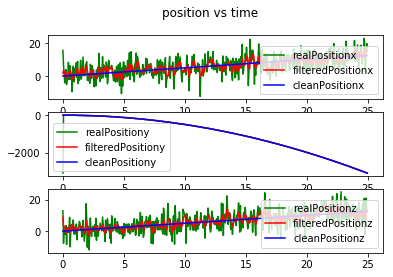

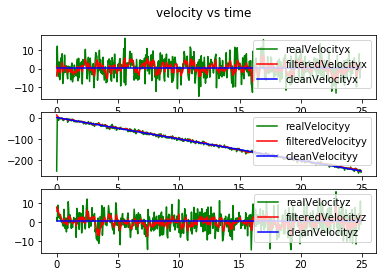

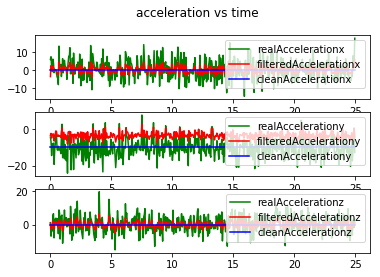

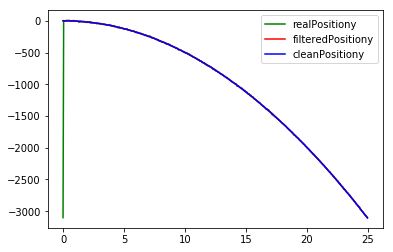

In [2]:
#!/usr/bin/python3

import Physics_Filter
import numpy
import matplotlib.pyplot as plt
import random

initialPosition = [0,0,0]
initialVelocity = [0.5,0,0.5]
MatrixSize = 500
whiteNoiseSTDev = 5
deltaT = 0.05

stateTransition = numpy.array(([[[1, 1, 1], [deltaT, deltaT, deltaT], [0, 0.5*deltaT**2, 0]], [[0, 0, 0], [1, 1, 1], [0, deltaT, 0]], [[0, 0, 0], [0, 0, 0], [0, 1, 0]]]))
wrongStateTransition = numpy.array(([[[1, 1, 1], [deltaT, deltaT, deltaT], [0,0, 0]], [[0, 0, 0], [1, 1, 1], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0]]]))

def main():
    
    measuredStates = dataGenerator(initialPosition, initialVelocity, deltaT, MatrixSize, whiteNoiseSTDev, stateTransition)
    
    whiteNoise = whiteNoiseGenerator(whiteNoiseSTDev, MatrixSize)

    randPosition = [random.randint(0,10), random.randint(0,10), random.randint(0,10)]
    randVelocity = [random.randint(0,10), random.randint(0,10), random.randint(0,10)]
    randProcess  = dataGenerator(randPosition, randVelocity, deltaT, MatrixSize, whiteNoiseSTDev, stateTransition)
    
    staticPositionData     = dataProcessor(0, whiteNoise)
    staticVelocityData     = dataProcessor(1, whiteNoise)
    staticAccelerationData = dataProcessor(2, whiteNoise)
    
    movingPositionData     = dataProcessor(0, randProcess)
    movingVelocityData     = dataProcessor(1, randProcess)
    movingAccelerationData = dataProcessor(2, randProcess)
    
    DEMO = Physics_Filter.Physics_Filter('DEMO')
    
    DEMO.priorState = measuredStates[0]

    DEMO.setupKalmanFilterDEMO(staticPositionData, staticVelocityData, staticAccelerationData, movingPositionData, movingVelocityData, movingAccelerationData)

    filteredData = numpy.zeros((MatrixSize,3,3))

    state = 0
    
    while state<MatrixSize:
        filteredData[state] = DEMO.KalmanFilterxvaDEMO(measuredStates[state], deltaT, wrongStateTransition)
        state = state+1
        
    cleanData = canonSimulator(initialPosition, initialVelocity, deltaT, MatrixSize, stateTransition)
    
    realData = measuredStates
    
    realPosition     = dataProcessor(0, realData)
    realVelocity     = dataProcessor(1, realData)
    realAcceleration = dataProcessor(2, realData)
    
    filteredPosition     = dataProcessor(0, filteredData)
    filteredVelocity     = dataProcessor(1, filteredData)
    filteredAcceleration = dataProcessor(2, filteredData)
    
    cleanPosition     = dataProcessor(0, cleanData)
    cleanVelocity     = dataProcessor(1, cleanData)
    cleanAcceleration = dataProcessor(2, cleanData)

    realPositionx = dataProcessor(0, realPosition)
    realPositiony = dataProcessor(1, realPosition)
    realPositionz = dataProcessor(2, realPosition)
    
    realVelocityx = dataProcessor(0, realVelocity)
    realVelocityy = dataProcessor(1, realVelocity)
    realVelocityz = dataProcessor(2, realVelocity)
    
    realAccelerationx = dataProcessor(0, realAcceleration)
    realAccelerationy = dataProcessor(1, realAcceleration)
    realAccelerationz = dataProcessor(2, realAcceleration)
    
    filteredPositionx = dataProcessor(0, filteredPosition)
    filteredPositiony = dataProcessor(1, filteredPosition)
    filteredPositionz = dataProcessor(2, filteredPosition)
    
    filteredVelocityx = dataProcessor(0, filteredVelocity)
    filteredVelocityy = dataProcessor(1, filteredVelocity)
    filteredVelocityz = dataProcessor(2, filteredVelocity)
    
    filteredAccelerationx = dataProcessor(0, filteredAcceleration)
    filteredAccelerationy = dataProcessor(1, filteredAcceleration)
    filteredAccelerationz = dataProcessor(2, filteredAcceleration)
    
    cleanPositionx = dataProcessor(0, cleanPosition)
    cleanPositiony = dataProcessor(1, cleanPosition)
    cleanPositionz = dataProcessor(2, cleanPosition)
    
    cleanVelocityx = dataProcessor(0, cleanVelocity)
    cleanVelocityy = dataProcessor(1, cleanVelocity)
    cleanVelocityz = dataProcessor(2, cleanVelocity)
    
    cleanAccelerationx = dataProcessor(0, cleanAcceleration)
    cleanAccelerationy = dataProcessor(1, cleanAcceleration)
    cleanAccelerationz = dataProcessor(2, cleanAcceleration)
    
    T = numpy.arange(0, MatrixSize*deltaT, deltaT)
    
    plt.figure(1)
    plt.figure(1).suptitle("position vs time")
    plt.subplot(311)
    plt.plot(T, realPositionx, 'g', label="realPositionx")
    plt.plot(T, filteredPositionx,'r', label="filteredPositionx")
    plt.plot(T, cleanPositionx, 'b', label="cleanPositionx")
    plt.legend(loc='best')
    plt.subplot(312)
    plt.plot(T, realPositiony, 'g', label="realPositiony")
    plt.plot(T, filteredPositiony, 'r', label="filteredPositiony")
    plt.plot(T, cleanPositiony, 'b', label="cleanPositiony")
    plt.legend(loc='best')
    plt.subplot(313)
    plt.plot(T, realPositionz, 'g', label="realPositionz")
    plt.plot(T, filteredPositionz, 'r', label="filteredPositionz")
    plt.plot(T, cleanPositionz, 'b', label="cleanPositionz")
    plt.legend(loc='best')
    
    plt.figure(2)
    plt.figure(2).suptitle("velocity vs time")
    plt.subplot(311)
    plt.plot(T, realVelocityx, 'g', label="realVelocityx")
    plt.plot(T, filteredVelocityx, 'r', label="filteredVelocityx")
    plt.plot(T, cleanVelocityx, 'b', label="cleanVelocityx")
    plt.legend(loc='best')
    plt.subplot(312)
    plt.plot(T, realVelocityy, 'g', label="realVelocityy")
    plt.plot(T, filteredVelocityy, 'r', label="filteredVelocityy")
    plt.plot(T, cleanVelocityy, 'b', label="cleanVelocityy")
    plt.legend(loc='best')
    plt.subplot(313)
    plt.plot(T, realVelocityz, 'g', label="realVelocityz")
    plt.plot(T, filteredVelocityz, 'r', label="filteredVelocityz")
    plt.plot(T, cleanVelocityz, 'b', label="cleanVelocityz")
    plt.legend(loc='best')

    plt.figure(3)
    plt.figure(3).suptitle("acceleration vs time")
    plt.subplot(311)
    plt.plot(T, realAccelerationx, 'g', label="realAccelerationx")
    plt.plot(T, filteredAccelerationx, 'r', label="filteredAccelerationx")
    plt.plot(T, cleanAccelerationx, 'b', label="cleanAccelerationx")
    plt.legend(loc='best')
    plt.subplot(312)
    plt.plot(T, realAccelerationy, 'g', label="realAccelerationy")
    plt.plot(T, filteredAccelerationy, 'r', label="filteredAccelerationy")
    plt.plot(T, cleanAccelerationy, 'b', label="cleanAccelerationy")
    plt.legend(loc='best')
    plt.subplot(313)
    plt.plot(T, realAccelerationz, 'g', label="realAccelerationz")
    plt.plot(T, filteredAccelerationz, 'r', label="filteredAccelerationz")
    plt.plot(T, cleanAccelerationz, 'b', label="cleanAccelerationz")
    plt.legend(loc='best')
    
    plt.figure(4)
    plt.plot(T, realPositiony, 'g', label="realPositiony")
    plt.plot(T, filteredPositiony, 'r', label="filteredPositiony")
    plt.plot(T, cleanPositiony, 'b', label="cleanPositiony")
    plt.legend(loc='best')    
    
    plt.figure(1).show()
    plt.figure(2).show()
    plt.figure(3).show()
    plt.figure(4).show()
    
    positionxResiduals = numpy.average(numpy.subtract(cleanPositionx,filteredPositionx))
    positionyResiduals = numpy.average(numpy.subtract(cleanPositiony,filteredPositiony))
    positionzResiduals = numpy.average(numpy.subtract(cleanPositionz,filteredPositionz))
    
    velocityxResiduals = numpy.average(numpy.subtract(cleanVelocityx,filteredVelocityx))
    velocityyResiduals = numpy.average(numpy.subtract(cleanVelocityy,filteredVelocityy))
    velocityzResiduals = numpy.average(numpy.subtract(cleanVelocityz,filteredVelocityz))
    
    accelerationxResiduals = numpy.average(numpy.subtract(cleanAccelerationx,filteredAccelerationx))
    accelerationyResiduals = numpy.average(numpy.subtract(cleanAccelerationy,filteredAccelerationy))
    accelerationzResiduals = numpy.average(numpy.subtract(cleanAccelerationz,filteredAccelerationz))
    
    print("positionxResiduals     = ", positionxResiduals)
    print("positionyResiduals     = ", positionyResiduals)
    print("positionzResiduals     = ", positionzResiduals)
    print("-------------------------------------------------")    
    print("velocityxResiduals     = ", velocityxResiduals)
    print("velocityyResiduals     = ", velocityyResiduals)
    print("velocityzResiduals     = ", velocityzResiduals)
    print("-------------------------------------------------")
    print("accelerationxResiduals = ", accelerationxResiduals)
    print("accelerationyResiduals = ", accelerationyResiduals)
    print("accelerationzResiduals = ", accelerationzResiduals)

def dataProcessor(spot, array):
    
    data = [x[spot] for x in array]
    
    return data
 
def whiteNoiseGenerator(std, matrixSize):
    
    return numpy.random.normal( 0, std, size=(matrixSize,3,3))
    
def canonSimulator(initialPos, initialVel, deltaT, matrixSize, stateTransition):
    
    measuredState       = numpy.zeros((matrixSize,3,3))
    initialAcceleration = [0,-9.98,0]
    initialState        = numpy.array((initialPos, initialVel, initialAcceleration))
    measuredState[0]    = initialState
    
    outerIndex = 0
    while outerIndex < 3:
        innerIndex = 0
        while innerIndex < (matrixSize-1): 
        
            measuredState[innerIndex+1,:,outerIndex] = numpy.dot(stateTransition[:,:,outerIndex],measuredState[innerIndex,:,outerIndex])
            innerIndex = innerIndex+1
        outerIndex = outerIndex+1

    return measuredState

def dataGenerator(initialPos, initialVel, deltaT, matrixSize, whiteNoiseSTD, stateTransition):
    
    whiteNoise           = whiteNoiseGenerator(whiteNoiseSTD, matrixSize)
    canonSimulation      = canonSimulator(initialPos, initialVel, deltaT, matrixSize, stateTransition)
    noisyCanonSimulation = canonSimulation + whiteNoise
    
    return noisyCanonSimulation

if __name__ == "__main__":
    main()
